# Gaurang Bharti

## How has Income Distribution and Population impacted housing prices in Vancouver?

For my project, I will be looking at the impact Income Distribution has on housing and rental prices. The expectation is to find a positive correlation that is > 0.5 as I believe the Income Distribution of a region plays a significant role in the decisions relating to pricing for houses. I believe the same to be true for Population as well. My dataset consists of multiple files of related data that I will showcase via the EDA and combine them according to related columns.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
file = ("../data/raw/housing-supply-price-rental.csv")

In [ ]:
dataset = pd.read_csv(file)

In [ ]:
dataset.head()

,Unnamed: 0,year,total_dwelling,single_detached,multiple,semi_detached,row,apartment,total_dwelling_market,homeownership_freehold,...,one_bedroom,two_bedroom,three_bedroom,population,labour_participation_rate,employment_change,unemployment_rate,disposable_income_change,migration,region
0,0,1990.0,3297,2847,450,57,6,387,2274,2004.0,...,418,524,608,1105.421,67.300,0.219444,7.4,-2.669133,-5108,manitoba
1,1,1991.0,1950,1589,361,14,0,347,1438,1085.0,...,424,531,630,1109.604,67.025,-1.364064,8.6,-2.669133,-5108,manitoba
2,2,1992.0,2310,1683,627,64,10,553,1821,1383.0,...,434,545,644,1112.689,66.475,-1.351685,9.3,-0.326989,-5108,manitoba
3,3,1993.0,2425,1874,551,52,83,416,1702,1338.0,...,435,550,652,1117.618,66.850,0.766782,9.3,-0.453243,-2520,manitoba
4,4,1994.0,3197,2441,756,72,410,274,1664,1289.0,...,440,551,645,1123.230,66.750,0.774181,8.8,0.161821,-1996,manitoba


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         944 non-null    int64  
 1   year                               944 non-null    float64
 2   total_dwelling                     944 non-null    int64  
 3   single_detached                    944 non-null    int64  
 4   multiple                           944 non-null    int64  
 5   semi_detached                      944 non-null    int64  
 6   row                                944 non-null    int64  
 7   apartment                          944 non-null    int64  
 8   total_dwelling_market              944 non-null    int64  
 9   homeownership_freehold             943 non-null    float64
 10  rental                             944 non-null    int64  
 11  homeownership_condo                944 non-null    int64  

In [ ]:
dataset.describe()

,Unnamed: 0,year,total_dwelling,single_detached,multiple,semi_detached,row,apartment,total_dwelling_market,homeownership_freehold,...,bachelor,one_bedroom,two_bedroom,three_bedroom,population,labour_participation_rate,employment_change,unemployment_rate,disposable_income_change,migration
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,943.000000,...,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,216.000000,944.000000
mean,12.986229,2002.987394,7744.455508,3795.960805,3953.541314,529.031780,836.416314,2588.093220,7175.943856,4230.386002,...,486.573093,603.315678,725.730932,841.563559,1331.566936,66.943868,1.779477,7.170832,2.209129,10902.468220
std,7.785623,7.784059,14087.306244,6966.388674,7670.701390,1039.896008,1877.404065,5336.020987,13014.429352,7960.867666,...,143.905077,166.331072,200.071349,245.950862,2443.322711,3.881136,2.422470,2.066741,2.554449,22867.784637
min,0.000000,1990.000000,151.000000,117.000000,0.000000,0.000000,0.000000,0.000000,151.000000,131.000000,...,-99.000000,339.000000,390.000000,413.000000,115.323000,57.600000,-8.044807,3.200000,-3.918201,-7718.000000
25%,6.000000,1996.000000,769.250000,430.750000,299.250000,38.000000,50.000000,133.000000,735.500000,495.500000,...,374.000000,470.750000,573.750000,649.500000,157.450750,64.400000,0.045436,5.800000,0.363344,605.000000
50%,13.000000,2003.000000,2256.000000,1192.000000,831.000000,122.000000,157.500000,455.500000,2038.000000,1326.000000,...,466.000000,573.000000,688.500000,798.500000,344.173500,66.800000,1.871172,6.800000,2.189235,2038.000000
75%,20.000000,2010.000000,5878.250000,3133.750000,2772.000000,414.750000,755.500000,1692.000000,5679.000000,3451.500000,...,574.250000,706.000000,850.000000,1005.750000,1004.721250,69.700000,3.152726,8.200000,3.720722,8575.000000
max,26.000000,2016.000000,85180.000000,51114.000000,51175.000000,7167.000000,12824.000000,37201.000000,80933.000000,62305.000000,...,1013.000000,1159.000000,1450.000000,1798.000000,13982.984000,77.000000,12.641509,17.600000,14.129519,170006.000000


### Initial comments on dataset

The dataset has quite a lot of data that's segregated by region for more granular analysis. This is quite useful to me as I can extract just Vancouver's data and use that for further analyses. There's also a lot of data split by types of houses. With my current Research Question, I will not be needing that data, so I will most likely remove those columns. Same goes for other irrelevant columns like Unemployment rate, etc. Overall, I'm happy with the data present in this Dataset.

# Exploratory Data Analysis

<AxesSubplot:>

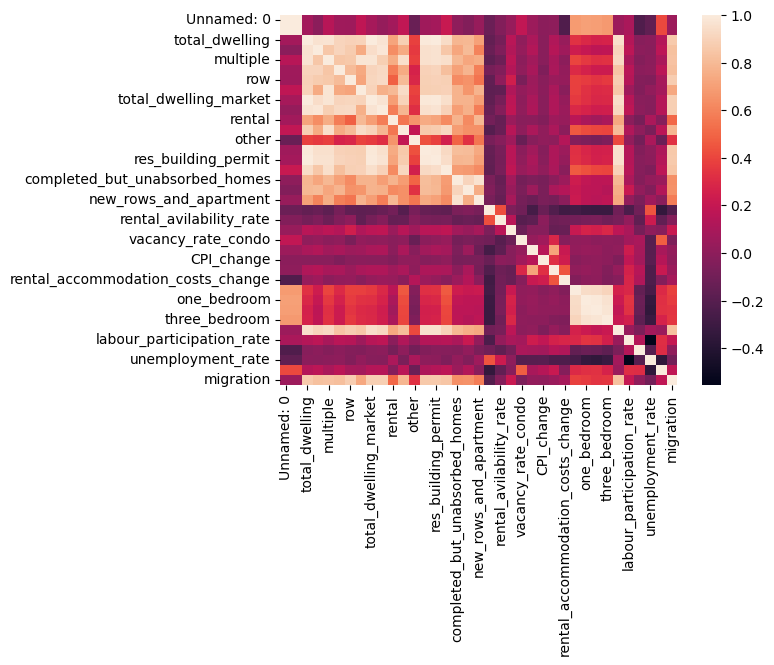

In [ ]:
sns.heatmap(dataset.corr())

### Comments:
This visualisation gives us a rounded picture of the correlations across the dataset. One problem we immediately see is that there are way too many columns, a lot of which have minor influences on each other - but are either irrelevant to our analysis, or are not useful without further context. So, we know that this dataset needs to be cleaned up so we can focus on just the columns we need.

[Text(0.5, 1.0, 'New dwellings started per year by region'),
 Text(0, 0.5, 'Total new dwellings'),
 Text(0.5, 0, 'Years')]

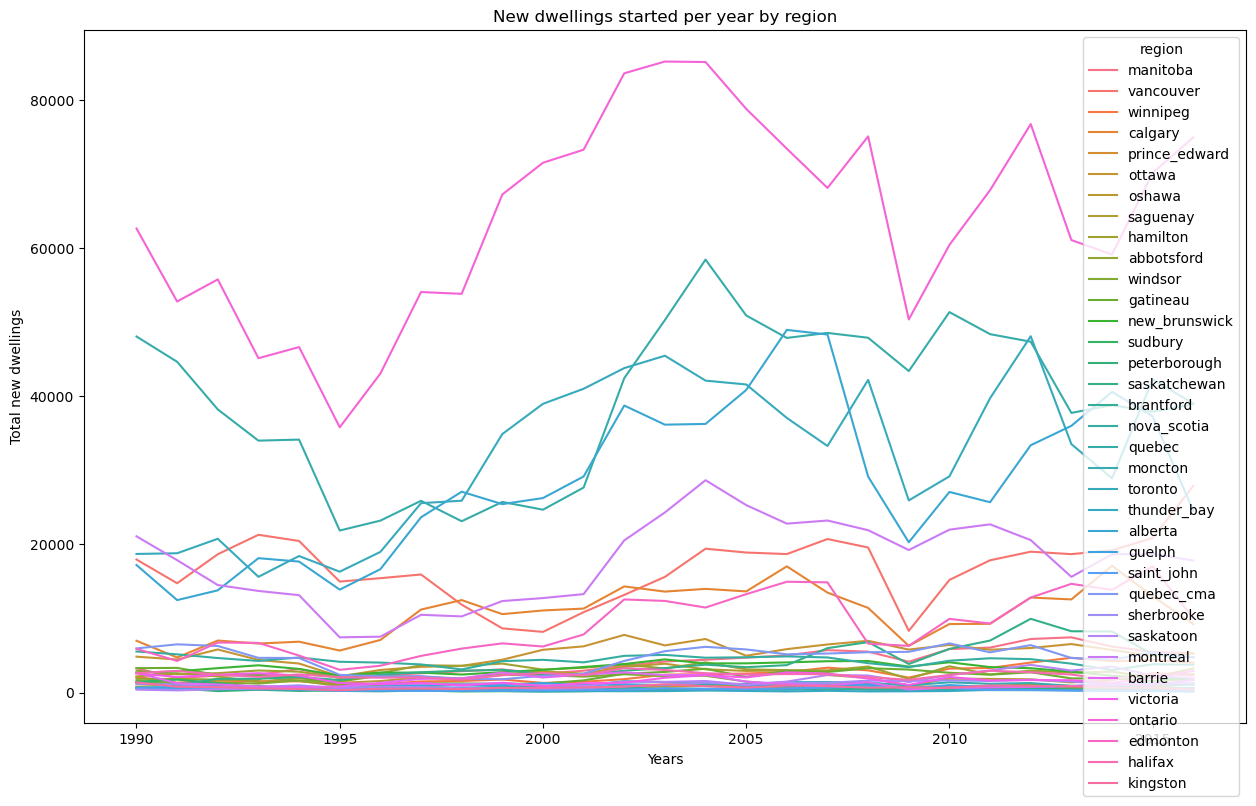

In [ ]:
plt.figure(figsize=(15, 9))
sns.lineplot(data=dataset, x="year", y="total_dwelling", hue="region").set(title="New dwellings started per year by region", ylabel="Total new dwellings", xlabel="Years")

### Comments
Here, we're able to see how many new dwellings (places to live) have their construction started on a year-by-year and region-by-region basis. This is a great way to get insight on the situation of the housing market across the years

In [ ]:
income_file = ("../data/raw/vancouver_income_main.csv")
income_dataset = pd.read_csv(income_file)
income_dataset.head()

,Year,"Number of persons (x1,000)","Number with income(x1,000)","Aggregate income (x1,000,000)",Average income (excluding zeros),Median income (excluding zeros)
0,1991,1297,1207,50945,42200,33600
1,1992,1361,1269,54374,42900,33200
2,1993,1367,1286,51793,40300,31400
3,1994,1405,1312,53292,40600,31900
4,1995,1429,1340,55544,41500,32600


[Text(0.5, 1.0, 'Average Income in Vancouver')]

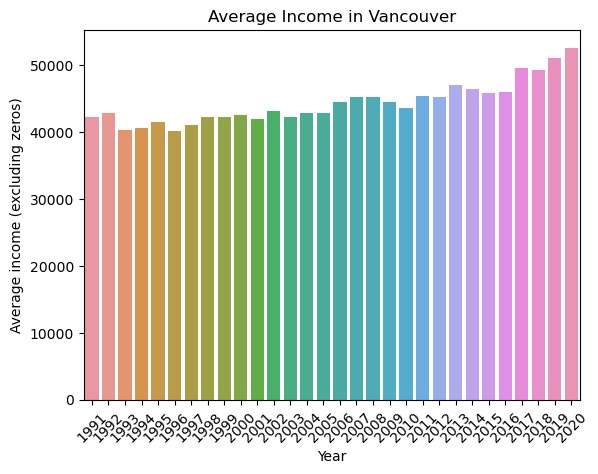

In [ ]:
plt.xticks(rotation=45)
graph = sns.barplot(data = income_dataset, x="Year", y="Average income (excluding zeros)")
graph.set(title="Average Income in Vancouver")

### Comments:
This bar graph gives us an understanding of the trend Average Income has followed in Vancouver. It has been rising consistently for quite a while now - but does not seem to follow the trends of HPI. Further analysis is needed but this is a good overview of its progression over the years.

In [ ]:
hpi_file = ("../data/raw/hpi_by_region.csv")
hpi_dataset = pd.read_csv(hpi_file)
hpi_dataset.head()

,Unnamed: 0,Type,Month-year,Canada,Atlantic Region,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,...,Manitoba,Saskatchewan,Alberta,British Columbia,"Kelowna, British Columbia","Vancouver, British Columbia","Victoria, British Columbia",Month-Year,year,month
0,0,House and Land,Jan-81,38.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,90.5,128.7,1981-01-01,1981,1
1,1,House and Land,Feb-81,38.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,92.2,130.1,1981-02-01,1981,2
2,2,House and Land,Mar-81,39.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,92.2,130.8,1981-03-01,1981,3
3,3,House and Land,Apr-81,39.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,91.8,130.8,1981-04-01,1981,4
4,4,House and Land,May-81,40.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,91.8,132.5,1981-05-01,1981,5


<AxesSubplot:xlabel='year', ylabel='Canada'>

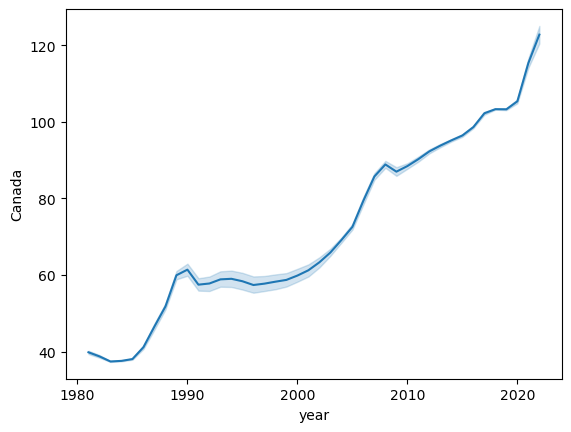

In [ ]:
sns.lineplot(data=hpi_dataset, x='year', y='Canada')

### Comments
This csv file is centered around HPI (Housing Price index) - so seeing the trend of HPI across Canada gives us some context on how housing prices have moved in the last few decades.

In [ ]:
def load_and_process(path):
    df1 = (
        pd.read_csv(str(path) + "housing-supply-price-rental.csv")
        .loc[lambda x: x['region']=='vancouver']
        .reset_index(drop=True)
        .loc[:, ['year', 'population', 'region', 'HPI_change', 'CPI_change', 'completed', 'rental', 'total_dwelling', 'employment_change']]
        .astype({'year': int})
        .loc[1:26]
    )
    
    df1['population'] *=1000
    
    df2 = (
        pd.read_csv(str(path) + "vancouver_income_main.csv")
        .set_axis(['year', 'no_of_people', 'people_with_income', 'aggre_income', 'avg_income', 'med_income'], axis=1)
        .loc[:, ['year', 'aggre_income', 'avg_income', 'med_income']]
        .loc[0:25]
    )
    
    df3 = (
        pd.read_csv(str(path) + "hpi_by_region.csv")
        .loc[:, ['year', 'Vancouver, British Columbia']]
        .set_axis(['year', 'total_hpi'], axis=1)
        
    )
    df4 = (df1.merge(df2, how='inner'))
    df5 = (df3.merge(df4, how='inner'))
    
    return df5

In [ ]:
final_df = load_and_process("../data/raw/")
final_df

,year,total_hpi,population,region,HPI_change,CPI_change,completed,rental,total_dwelling,employment_change,aggre_income,avg_income,med_income
0,1991,79.5,1646854.0,vancouver,-7.160019,5.171306,14630,1738,14769,2.457594,50945,42200,33600
1,1991,77.3,1646854.0,vancouver,-7.160019,5.171306,14630,1738,14769,2.457594,50945,42200,33600
2,1991,78.9,1646854.0,vancouver,-7.160019,5.171306,14630,1738,14769,2.457594,50945,42200,33600
3,1991,79.1,1646854.0,vancouver,-7.160019,5.171306,14630,1738,14769,2.457594,50945,42200,33600
4,1991,80.0,1646854.0,vancouver,-7.160019,5.171306,14630,1738,14769,2.457594,50945,42200,33600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,2016,99.2,2548740.0,vancouver,4.626774,2.173170,18148,6841,27914,4.674625,97576,46000,35500
932,2016,99.5,2548740.0,vancouver,4.626774,2.173170,18148,6841,27914,4.674625,97576,46000,35500
933,2016,100.0,2548740.0,vancouver,4.626774,2.173170,18148,6841,27914,4.674625,97576,46000,35500
934,2016,100.0,2548740.0,vancouver,4.626774,2.173170,18148,6841,27914,4.674625,97576,46000,35500


# Research Answers
After going over the EDA and cleaning up the data, I now have the tools needed to answer my research question. I would like to see the correlation across all the columns that are left and dive deeper into the ones relevant to my question. Certain assumptions I had about what the data should look like have already been proven wrong after the EDA. This is a good sign - as there are unexpected trends, it's worth diving deeper and trying to investigate why that's the case.

<AxesSubplot:>

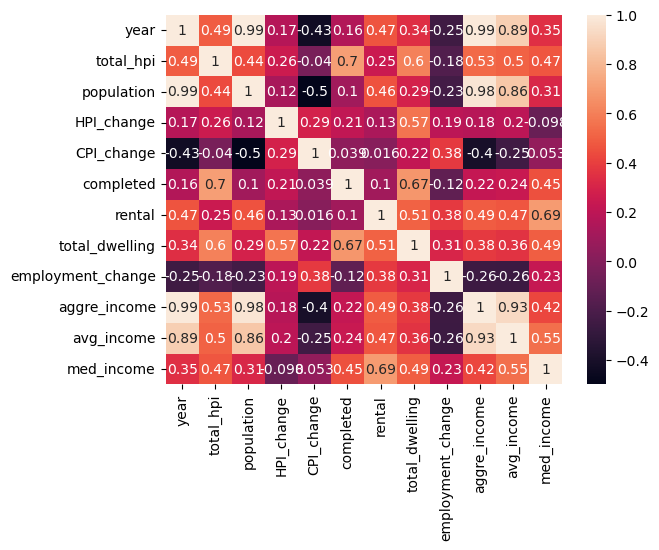

In [ ]:
sns.heatmap(final_df.corr(), annot=True)

### Comments
From this heatmap, it looks like the total HPI is heavily influenced by Completed houses and Total Dwellings, both of which are very similar. The next highest influence was by Aggregate Income, followed by Population. This was somewhat expected, but I was hoping for stronger correlations. From this, it looks like all of the above mentioned factors play a fairly important role in resulting HPI. We can plot these individually and have a look at how they correlate even further.

<seaborn.axisgrid.PairGrid>

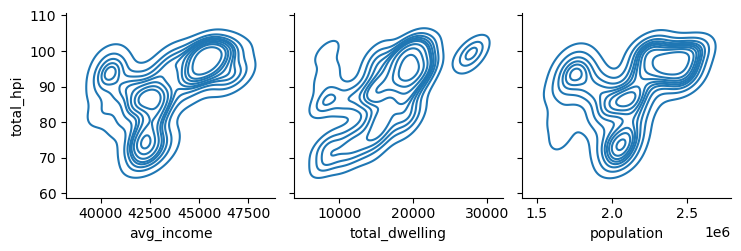

In [ ]:
sns.pairplot(final_df, x_vars=["avg_income", "total_dwelling", "population"], y_vars=["total_hpi"], kind="kde")

### Comments
A few things jump out at first glance when looking at this visualisation. The graphs for Population and Average Income seem to be relatively similar, but Total Dwellings seem to be following a different pattern. As all 3 are contributing factors, it's valuable to try and find why this is the case. Total dwellings had the highest correlation with HPI out of all these 3 columns - so its values is quite important.

<seaborn.axisgrid.PairGrid>

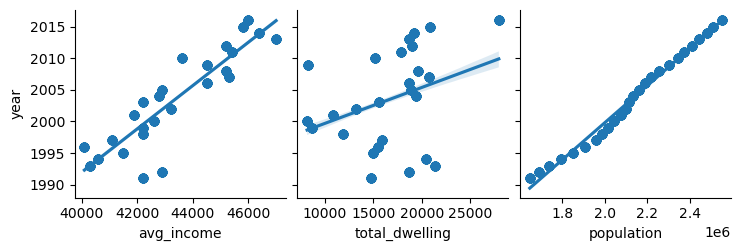

In [ ]:
sns.pairplot(final_df, x_vars=["avg_income", "total_dwelling", "population"], y_vars=["year"], kind="reg")

### Comments
Very interesting! This explains a lot. Average income and Population have been increasing steadily and quite steeply since 1990, but the total amount of houses being constructed has not been keeping up. This shows us the potential discrepancy in Supply and Demand - the demand for housing has continued to go up due to the steady rise in population, but the supply has not been keeping up. And, as average income has been rising, the housing market has been able to steadily increase prices too.

## Conclusion
From the analysis, we were able to see the discrepancy that exists with the Supply and Demand of housing in Vancouver. This would naturally cause an increase in the housing market. 
Alongside that, we see the steady increase in average income. This shows us that while the prices have gone up - so has the average income, explaining why the HPI has continued to rise - the population has been able to keep up with the pricing.
One solution to this is fairly obvious - if there was an increase in total dwellings, enough to get closer to the growth of population, the HPI would be more under control.
While there are multiple other factors influencing HPI that cannot be determined through this dataset as its quite a complex calculation - fixing the gap between supply and demand is a good start to fixing the housing prices.